# Attempt at NN

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from path import Path
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

%load_ext autotime

In [2]:
# Set the random seed for reproducibility
# Note: This is for the homework solution, but it is good practice to comment this out and run multiple experiments to evaluate your model
from numpy.random import seed
seed(1)
from tensorflow import random
random.set_seed(2)

time: 1 ms


In [32]:
file_path = Path("../../../../data/cleandata/test_and_post_ico/ico_test_df.csv")
test_icos = pd.read_csv(file_path)

In [50]:
mean_custom_index = list(test_icos[['custom_index_scaled']].mean())[0]

time: 4 ms


In [52]:
success = pd.DataFrame()
for i in range(len(test_icos)) : 
        #print(str(df.at[i,"pre_Duration"])[:-24])
        if test_icos.at[i, 'custom_index_scaled'] > mean_custom_index:
            success.at[i,'success'] = 1
        else:
            success.at[i,'success'] = 0

time: 570 ms


In [59]:
success['success'].value_counts()

0.0    522
1.0     13
Name: success, dtype: int64

time: 8 ms


In [3]:
file_path = Path("../../../../data/cleandata/1hot_merged_post_ICO.csv")
df = pd.read_csv(file_path)

time: 23 ms


In [61]:
df['success'] = success

In [76]:
np.where(pd.isnull(df))

In [77]:
df.fillna(0, inplace= True)

time: 3 ms


In [78]:
df.shape

(537, 98)

time: 2 ms


In [79]:
df.columns

Index(['Name', 'Ticker', 'Duration', 'pre_Duration', 'compound', 'negative',
       'neutral', 'positive', 'no_of_posts', 'Longevity', 'success',
       'Twitter_Compound', 'Twitter_Negative', 'Twitter_Neutral',
       'Twitter_Positive', 'country_Argentina', 'country_Armenia',
       'country_Australia', 'country_Austria', 'country_Azerbaijan',
       'country_Bahamas', 'country_Belarus', 'country_Belgium',
       'country_Belize', 'country_British Indian Ocean Territory',
       'country_Bulgaria', 'country_Cambodia', 'country_Canada',
       'country_Cayman Islands', 'country_China', 'country_Costa Rica',
       'country_Cyprus', 'country_Czech Republic', 'country_Denmark',
       'country_Estonia', 'country_Finland', 'country_France',
       'country_Germany', 'country_Gibraltar', 'country_Hong Kong',
       'country_Ireland', 'country_Isle of Man', 'country_Israel',
       'country_Japan', 'country_Kenya', 'country_Kyrgyzstan', 'country_Laos',
       'country_Latvia', 'country_Lie

time: 3.99 ms


In [80]:
X = df.drop(columns = ['Ticker','Name'])

time: 2.02 ms


In [81]:
X.columns

Index(['Duration', 'pre_Duration', 'compound', 'negative', 'neutral',
       'positive', 'no_of_posts', 'Longevity', 'success', 'Twitter_Compound',
       'Twitter_Negative', 'Twitter_Neutral', 'Twitter_Positive',
       'country_Argentina', 'country_Armenia', 'country_Australia',
       'country_Austria', 'country_Azerbaijan', 'country_Bahamas',
       'country_Belarus', 'country_Belgium', 'country_Belize',
       'country_British Indian Ocean Territory', 'country_Bulgaria',
       'country_Cambodia', 'country_Canada', 'country_Cayman Islands',
       'country_China', 'country_Costa Rica', 'country_Cyprus',
       'country_Czech Republic', 'country_Denmark', 'country_Estonia',
       'country_Finland', 'country_France', 'country_Germany',
       'country_Gibraltar', 'country_Hong Kong', 'country_Ireland',
       'country_Isle of Man', 'country_Israel', 'country_Japan',
       'country_Kenya', 'country_Kyrgyzstan', 'country_Laos', 'country_Latvia',
       'country_Liechtenstein', 'coun

time: 4 ms


In [82]:
y = df["success"].values
y.shape

(537,)

time: 3.98 ms


In [83]:
X = X.values
X.shape

(537, 96)

time: 4 ms


In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.33)

time: 2 ms


In [85]:
X_scaler = StandardScaler()
X_scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

time: 4.99 ms


In [86]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

time: 3 ms


In [87]:
# Define the model - shallow neural network
nn = Sequential()

nn.add(Dense(units=8, input_dim=96, activation='softplus'))

nn.add(Dense(units=10, input_dim=96, activation='selu'))
# Output layer
nn.add(Dense(units=1, activation="sigmoid"))

time: 168 ms


In [143]:
# Compile the model
nn.compile(loss='kullback_leibler_divergence', optimizer='Adagrad', metrics=["mse"])

# Fit the model
model = nn.fit(X_train_scaled, y_train, epochs=10000, verbose=0)

time: 3min 47s


In [144]:
# Save model as JSON
nn_json = nn.to_json()

file_path = Path("../NN_model/model_1hot_test_nn.json")

with open(file_path, "w") as json_file:
    json_file.write(nn_json)

# Save weights
file_path = Path("../NN_model/model_1hot_test_nn.h5")
nn.save_weights(file_path)

time: 30 ms


In [145]:
# Load the saved model to make predictions
from tensorflow.keras.models import model_from_json

# load json and create model
file_path = Path("../NN_model/model_1hot_test_nn.json")

with open(file_path, "r") as json_file:
    model_json = json_file.read()
    
loaded_model = model_from_json(model_json)

# load weights into new model
file_path = Path("../NN_model/model_1hot_test_nn.h5")
loaded_model.load_weights("../NN_model/model_1hot_test_nn.h5")

time: 183 ms


In [146]:
predicted = loaded_model.predict(X_test_scaled)

time: 107 ms


In [147]:
model.history.keys()

dict_keys(['loss', 'mse'])

time: 2 ms


In [148]:
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

178/1 - 0s - loss: -1.5982e-06 - mse: 0.9831
Normal Neural Network - Loss: -1.5846430358762742e-06, Accuracy: 0.9831212759017944
time: 223 ms


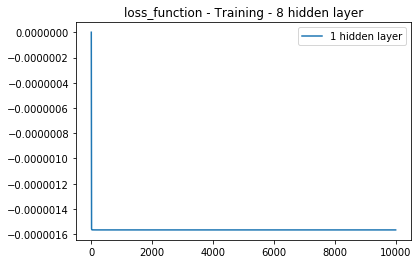

time: 271 ms


In [149]:
plt.plot(model.history["loss"])
plt.title("loss_function - Training - 8 hidden layer")
plt.legend(["1 hidden layer"])
plt.show()
#This was after I dropped the custom index

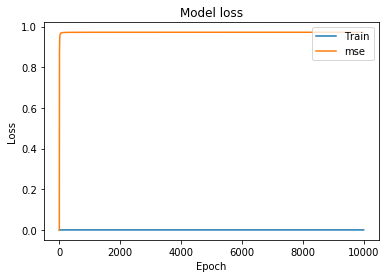

time: 238 ms


In [150]:
plt.plot(model.history['loss'])
plt.plot(model.history['mse'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'mse'], loc='upper right')
plt.show()

In [151]:
min(model.history["loss"])

-1.5669106399534604e-06

time: 3.99 ms


In [95]:
# file_path = Path("../../../../data/cleandata/success_NN_1H_testICO_df.csv")
# df.to_csv(file_path, index=False)

Error in callback <function LineWatcher.stop at 0x0000029DB8797E18> (for post_run_cell):


AssertionError: 

# Time to predict using the 360 day ICOs

In [152]:
file_path2 = Path("../../../../data/cleandata/1hot_merged_360_ICO.csv")
ico_360 = pd.read_csv(file_path2)

time: 15.1 ms


In [153]:
# Load the saved model to make predictions
from tensorflow.keras.models import model_from_json

# load json and create model
file_path = Path("../NN_model/model_1hot_test_nn.json")

with open(file_path, "r") as json_file:
    model_json = json_file.read()
    
loaded_model = model_from_json(model_json)

# load weights into new model
file_path = Path("../NN_model/model_1hot_test_nn.h5")
loaded_model.load_weights("../NN_model/model_1hot_test_nn.h5")

time: 169 ms


In [154]:
ico_360.columns

Index(['Name', 'Ticker', 'Duration', 'pre_Duration', 'compound', 'negative',
       'neutral', 'positive', 'no_of_posts', 'Longevity', 'success',
       'Twitter_Compound', 'Twitter_Negative', 'Twitter_Neutral',
       'Twitter_Positive', 'country_Argentina', 'country_Armenia',
       'country_Australia', 'country_Austria', 'country_Azerbaijan',
       'country_Bahamas', 'country_Belarus', 'country_Belgium',
       'country_Belize', 'country_British Indian Ocean Territory',
       'country_Bulgaria', 'country_Cambodia', 'country_Canada',
       'country_Cayman Islands', 'country_China', 'country_Costa Rica',
       'country_Cyprus', 'country_Czech Republic', 'country_Denmark',
       'country_Estonia', 'country_Finland', 'country_France',
       'country_Germany', 'country_Gibraltar', 'country_Hong Kong',
       'country_Ireland', 'country_Isle of Man', 'country_Israel',
       'country_Japan', 'country_Kenya', 'country_Kyrgyzstan', 'country_Laos',
       'country_Latvia', 'country_Lie

time: 5 ms


In [155]:
X = ico_360.drop(columns = ['Ticker','Name'])

time: 2 ms


In [156]:
X = X.values
X.shape

(36, 96)

time: 3 ms


In [157]:
X_scaler = StandardScaler()
X_scaler.fit(X)
X_scaled = X_scaler.transform(X)
predictions = nn.predict(X_scaled)

time: 148 ms


In [158]:
X_scaled

array([[-0.390723  , -0.32494699,  0.46499344, ...,  0.        ,
        -0.24253563, -0.16903085],
       [-0.18686752,  1.98508475,  0.56353735, ...,  0.        ,
        -0.24253563, -0.16903085],
       [-0.43149409, -0.27942913,  0.90378238, ...,  0.        ,
        -0.24253563, -0.16903085],
       ...,
       [-0.67612067, -0.43874166, -0.74796412, ...,  0.        ,
        -0.24253563, -0.16903085],
       [-0.81202432, -0.14287553,  1.03493778, ...,  0.        ,
        -0.24253563, -0.16903085],
       [ 0.58778329,  0.58541034,  1.13943765, ...,  0.        ,
         4.12310563, -0.16903085]])

time: 3.99 ms


In [159]:
len(predictions)

36

time: 1.99 ms


In [160]:
file_path = Path("../../../../data/cleandata/test_and_post_ico/ico_360days_df.csv")
ico_360days_df = pd.read_csv(file_path)

time: 11 ms


In [161]:
ico_360days_df['Success_Index'] = predictions*100

time: 1.99 ms


In [162]:
ico_360days_df['Success_Index']

0      99.999985
1      99.999870
2     100.000000
3     100.000000
4     100.000000
5      99.999977
6     100.000000
7     100.000000
8     100.000000
9      99.999985
10    100.000000
11    100.000000
12    100.000000
13     99.999969
14    100.000000
15    100.000000
16    100.000000
17    100.000000
18     99.991379
19    100.000000
20     99.999260
21     99.999908
22    100.000000
23    100.000000
24    100.000000
25    100.000000
26    100.000000
27           NaN
28           NaN
29    100.000000
30     99.999992
31     99.999405
32    100.000000
33     99.999977
34     99.999985
35     99.999031
Name: Success_Index, dtype: float32

time: 4.01 ms


In [139]:
file_path = Path("../../../../data/cleandata/final_success_NN_1H_ICO360_df.csv")
ico_360.to_csv(file_path, index=False)

time: 21 ms
